 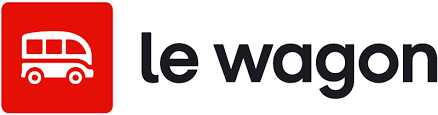

# Spotify clustering

In this challenge, we'll be using a dataset from Spotify that contains metadata for songs on the platform.

By metadata we mean info about the song such as name, artists, metrics about it's sound and other musical attributes.

We will use this dataset to try and cluster songs together that are closely related! This is the underlying theory behind how recommender algorithms work on sites such as Spotify, Netflix, etc.

## Data Exploration

Please run the cell below to return the spotify song data!

In [ ]:
import pandas as pd

spotify_df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_spotify_data.csv')
spotify_df.head()

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341
3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716


For the purposes of our analyses, we will only need the numeric features from our dataset. Select only these and save them in a variable called `spotify_numeric`

In [ ]:
spotify_numeric = spotify_df.drop(['name','artists'], axis=1)
spotify_numeric

,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783
2,21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341
3,22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005
4,23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716
...,...,...,...,...,...,...,...,...,...,...
9995,72,0.786,0.608,0.808,0,7,0.0822,-3.702,0.0881,105.029
9996,68,0.717,0.734,0.753,0,7,0.1010,-6.020,0.0605,137.936
9997,76,0.634,0.637,0.858,0,4,0.2580,-2.226,0.0809,91.688
9998,70,0.671,0.195,0.623,1,2,0.6430,-7.161,0.3080,75.055


Have a read through your features and try to understand what they are related to!

Spotify generate their own features that relate to abstract characteristcs that can be attributed to a piece of music (e.g. 'valence' or 'danceability'), you don't need to worry about how these are calculated!

Then we also have some information that is more literal such as the 'key', 'tempo' and whether a song is 'explicit' or not.

Investiate the distributions of some of your variables below:

- What is the ratio of explicit vs non-explicit songs?
- How is popularity distributed?
- How are Spotify's internal song metrics distributed?

In [ ]:
# the ratio of explicit vs non-explicit songs
# ratio_ec_non_ec = round((spotify_numeric[spotify_numeric['explicit'] == 1].shape[0] / spotify_numeric[spotify_numeric['explicit'] == 0].shape[0]) * 100, 2)

In [ ]:
explicit_ratio = spotify_df['explicit'].value_counts(normalize=True) * 100
display("Ratio of Explicit vs. Non-Explicit Songs:")
display(explicit_ratio)

'Ratio of Explicit vs. Non-Explicit Songs:'

0    89.68
1    10.32
Name: explicit, dtype: float64

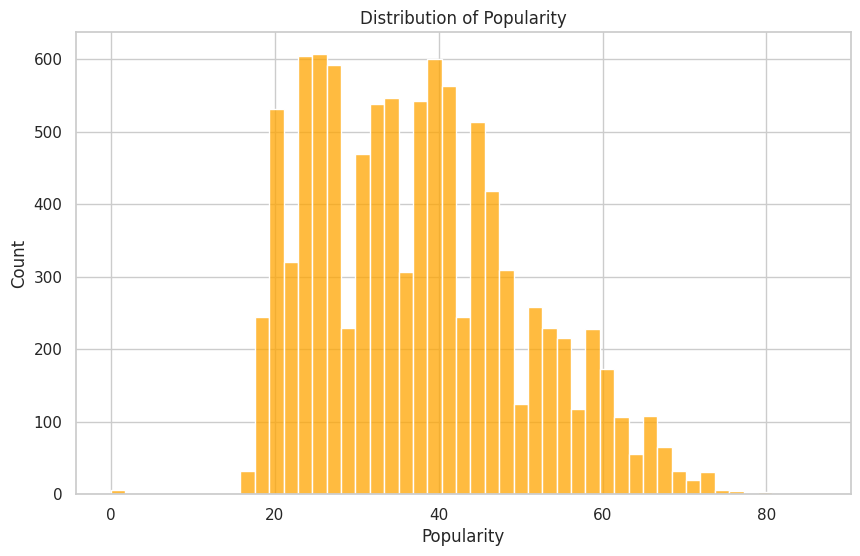

In [ ]:
# How is popularity distributed?

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(spotify_df['popularity'], color='orange')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

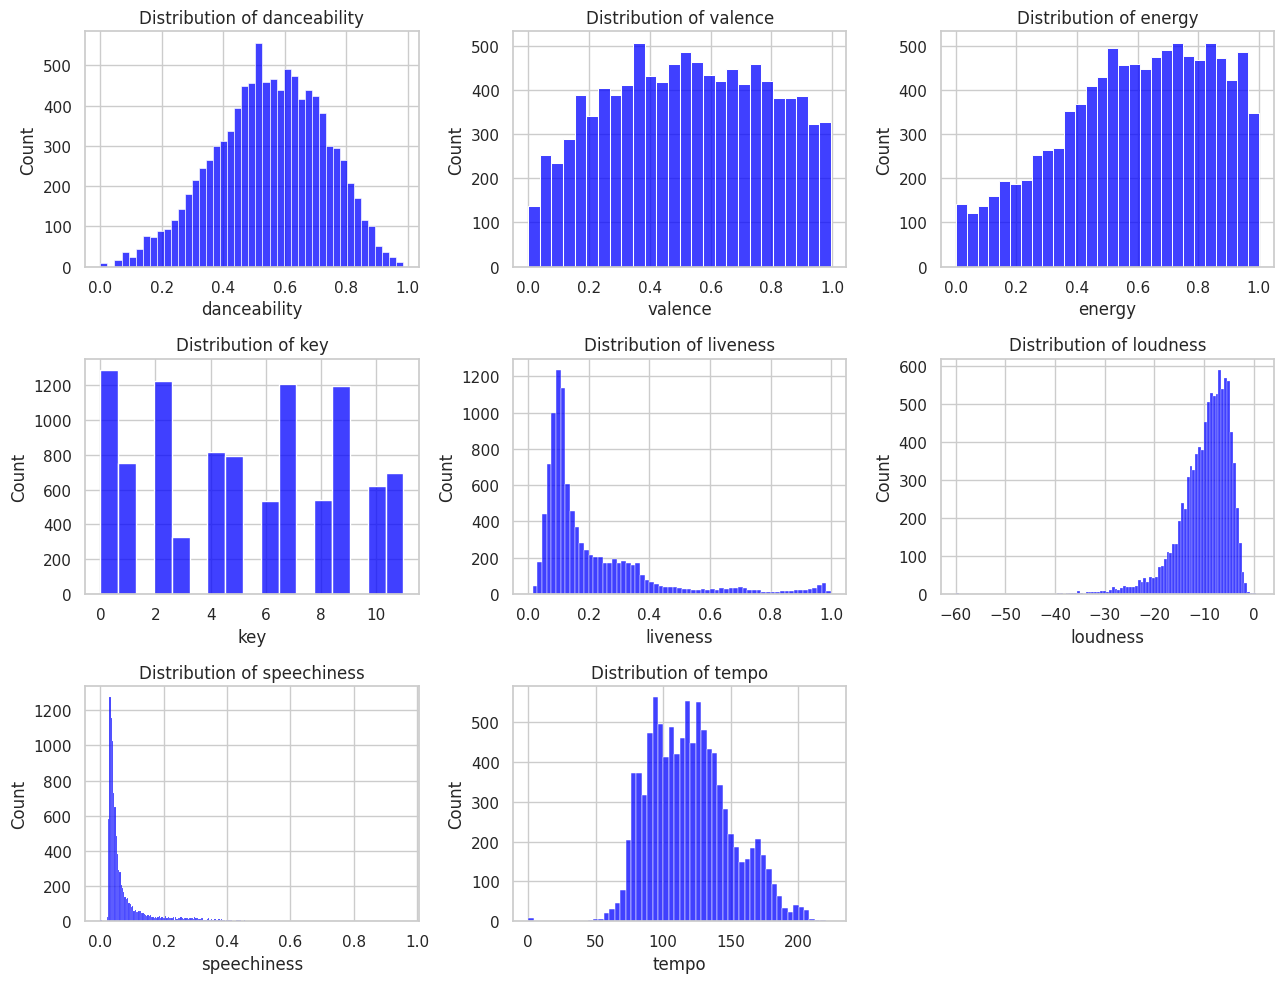

In [ ]:
# How are Spotify's internal song metrics distributed?

plt.figure(figsize=(13, 10))
sns.set_style("whitegrid")

spotify_metrics = spotify_numeric[['danceability', 'valence', 'energy', 'key', 'liveness', 'loudness', 'speechiness', 'tempo']]

# Plot distributions
for i, col in enumerate(spotify_metrics.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(spotify_metrics[col], color='blue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()



The cell below will visualize three of your features in 3D space. Feel free to switch up the variables that are being used for the *x*, *y*, *z* axes.

Because we are using plotly express, you can use your cursor to move around / zoom in & out of the chart.

In [ ]:
import plotly.express as px

fig = px.scatter_3d(spotify_numeric,
                    x = 'energy',
                    y = 'danceability',
                    z = 'speechiness',
                    opacity=0.7, width=500, height=500
           )
fig.show()

## First model

Our goal in this challenge is to cluster our songs into similar groups! The plot above may or may not reveal things that look like clusters, but remember! We can only visualise three of our variables here at a time.

When we train a clustering model it will cluster our songs in n-dimensional space, where n is the number of features being fed into the model.

Let's start by instantiating a simple KMeans model, with 8 clusters.

Fit this to your numeric spotify data and save the labels that your model has stored in a variable called `labels_simple`.

<details>
    <summary><i>Hint</i></summary>

To get the labels, have a look at the attributes your model has once it has been fitted to your data.
</details>

In [ ]:
from sklearn.cluster import KMeans

# Selecting relevant columns
spotify_numeric = spotify_numeric[['energy', 'danceability', 'speechiness']]

# Instantiate KMeans with 8 clusters
kmeans_eight = KMeans(n_clusters=8, random_state=42)

kmeans_eight.fit(spotify_numeric)

labels_eight = kmeans_eight.labels_

# Display the first few labels
display(labels_eight[:10])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([7, 4, 1, 3, 7, 4, 4, 4, 0, 5], dtype=int32)

What is the distribution of our labels? How many songs do we have in each cluster?

In [ ]:
# Calculate the distribution of labels
label_distribution = pd.Series(labels_eight).value_counts()

# Display the distribution
print("Distribution of Labels:")
print(label_distribution)

Distribution of Labels:
0    1704
1    1628
2    1549
7    1519
4    1258
3    1065
6     819
5     458
dtype: int64


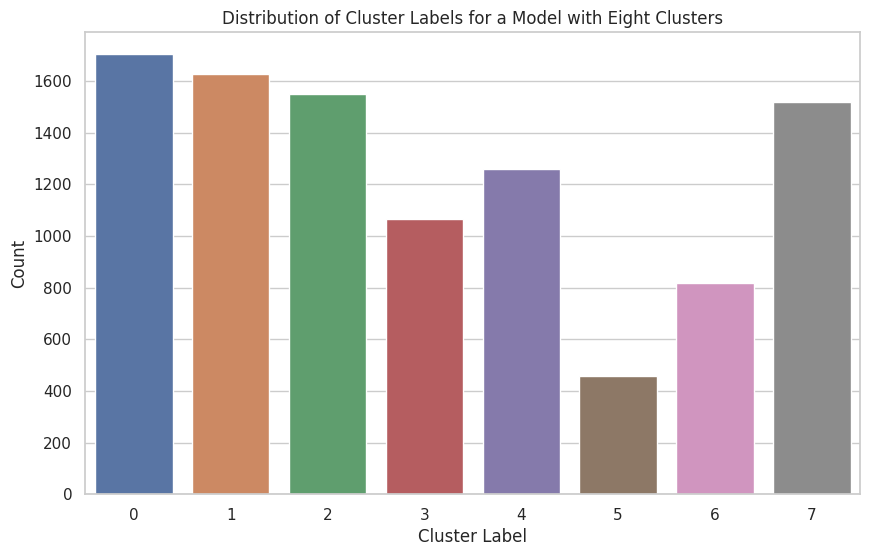

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(x=labels_eight)
plt.title('Distribution of Cluster Labels for a Model with Eight Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()

We can also now visualise our songs in 3D space again, but this time colour them by our new labels to see what clusters we have created! Run the cell below to see how it's looking.

In [ ]:
fig = px.scatter_3d(spotify_numeric,
                    x = 'danceability',
                    y = 'energy',
                    z = 'speechiness',
                    color = labels_eight, width=500, height=500)
fig.show()

It looks a little bit chaotic doesn't it... I'm not sure I'd be forking out the monthly suscription costs if my discover weekly was as all the place as this chart is.

Do you have any intuitions as to why our labels might look so poorly clustered?

<details>
    <summary><i>Answer</i></summary>

Remember that KMeans (and most unsupervised learning algorithms) are distance based. We have **not** scaled our numeric features yet. Perhaps doing this will make things look a bit clearer?
</details>

In the cell below, perform the preprocessing on our dataset that you deem necessary!

## Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

spotify_numeric = spotify_numeric[['energy', 'danceability', 'speechiness']]

# Standardize
scaler = StandardScaler()
spotify_numeric_scaled = scaler.fit_transform(spotify_numeric)

spotify_numeric_scaled


array([[-0.63785382,  0.72151114, -0.47802994],
       [-0.892028  , -0.52506122, -0.53177889],
       [ 0.52181589, -0.65421061, -0.43423451],
       ...,
       [ 1.05399309,  0.47444275, -0.00523833],
       [ 0.12069726,  0.68220481,  2.25520325],
       [ 0.50990148,  1.72101511,  0.26450172]])

## Modelling with preprocessed data

Now, let's train and fit a model in the same way that we did above. However, this time we will use the scaled data! Save the labels in a variable called `labels_scaled`

In [ ]:

# Instantiate KMeans with 8 clusters
kmeans_scaled = KMeans(n_clusters=8, random_state=42)

# Fit the KMeans model to the scaled numeric data
kmeans_scaled.fit(spotify_numeric_scaled)

# Get the labels assigned by the model
labels_scaled = kmeans_scaled.labels_

# Display the first few labels
display(labels_scaled[:10])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([6, 5, 1, 2, 6, 5, 5, 5, 2, 0], dtype=int32)

Run the cell below to see how our clusters look in 3D space, but with our newly scaled data.

In [ ]:
fig_scaled = px.scatter_3d(spotify_numeric_scaled,
                           x = 1,
                           y = 0,
                           z = 2,
                           color = labels_scaled,
                           width=500, height=500)
fig_scaled.show()

## Finding the right value for *K*

It should look a bit more tidy, maybe a bit more stratified! Progress!

**However, it still doesn't look perfect**. Remember though, we are only looking at 3 dimensions out of the 10 dimensions that our model is trained on.

It might be that, if we could visualise 10 dimensionsal space, we would see some much more intuitively shaped clusters!

So far we have been using 8 clusters for our models so far, but we havented tested whether this makes sense.

Let's use *the elbow method* to check how many of clusters we should ideally be using for this dataset. Do this below. Remember to use a plot to visualise your results.



In [ ]:
#We run KMeans with different numbers of clusters (from 1 to 10).

inertias = []
random_clusters = range(1, 11)


In [ ]:
#We calculate and store the inertia for each model.

for n_clusters in random_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(spotify_numeric_scaled)
    inertias.append(kmeans.inertia_)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

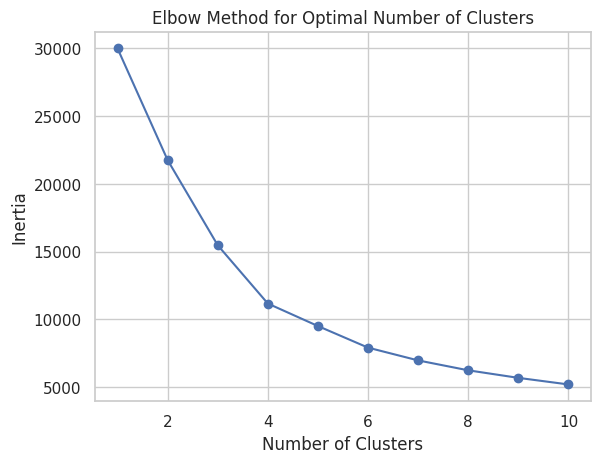

In [ ]:
# We plot the elbow curve to visualize the relationship between the number of clusters and inertia.

plt.plot(random_clusters, inertias, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## Creating a model with the ideal number of clusters

It looks as though have around 6 clusters makes sense with our dataset. Create a new KMeans model using 6 clusters and plot it in 3D space using the same process that we have done above.

In [ ]:
# Instantiate KMeans with 6 clusters
kmeans_six = KMeans(n_clusters=6, random_state=42)

# Fit the KMeans model to the scaled numeric data
kmeans_six.fit(spotify_numeric_scaled)

# Get the labels assigned by the model
labels_six = kmeans_six.labels_

# Visualize in 3D space
fig_six = px.scatter_3d(spotify_numeric_scaled,
                                x=1,
                                y=0,
                                z=2,
                                color=labels_six,
                                width=500, height=500)

fig_six.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



The chart doesn't reveal a whole lot more, but perhaps we can create some theoretical playlists based on our clusters?

Add the new labels from our model that has 6 clusters to our original spotify dataframe as a column called 'label'.

In [ ]:
spotify_df['label'] = labels_six

# Display the updated DataFrame with the 'label' column
spotify_df.head()

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo,label
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674,2
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783,2
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341,3
3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005,3
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716,2


## Generating Spotify playlists based on our clusters!

We should now see the original meta-data for our spotify songs, but **with the added label of which cluster they are located in** based on our KMeans algorithm

Let's generate 6 playlists (one for each cluster) that contains 15 random songs from that cluster.

Below we have created a dictionary called `daily_mixes`. Inside this dictionary we want to store keys that are the name of the cluster labels, and then as values we want dataframes that only contains the songs from that specific cluster.

Finish the for loop below to obtain this dictionary!

In [ ]:
daily_mixes = {}

for cluster in spotify_df['label'].unique():
    # Select songs for the current cluster
    cluster_songs = spotify_df[spotify_df['label'] == cluster].sample(15, random_state=42)
    daily_mixes[f'Cluster_{cluster}'] = cluster_songs

# Display the generated playlists
for playlist_name, playlist_df in daily_mixes.items():
    print(f"\n{playlist_name} Playlist:")
    print(playlist_df[['track_name', 'artist_name']])
    print()


Cluster_2 Playlist:

Cluster_3 Playlist:

Cluster_4 Playlist:

Cluster_0 Playlist:

Cluster_1 Playlist:

Cluster_5 Playlist:


Run the cell below to print out our 6 playlists!!!

In [ ]:
for key,value in daily_mixes.items():
  print("-"*50)
  print(f"Here are some songs for playlist {key}")
  print("-"*50)

value.sample(5)[['name','artists']]

--------------------------------------------------
Here are some songs for playlist Cluster_2
--------------------------------------------------
--------------------------------------------------
Here are some songs for playlist Cluster_3
--------------------------------------------------
--------------------------------------------------
Here are some songs for playlist Cluster_4
--------------------------------------------------
--------------------------------------------------
Here are some songs for playlist Cluster_0
--------------------------------------------------
--------------------------------------------------
Here are some songs for playlist Cluster_1
--------------------------------------------------
--------------------------------------------------
Here are some songs for playlist Cluster_5
--------------------------------------------------


,name,artists
6496,Vibrate,['OutKast']
996,Intro To Warm Beer And Cold Women,['Tom Waits']
435,Class Clown - Bi-Labial Fricative / Attracting...,['George Carlin']
184,Introduction,['B.B. King']
1437,Incidental CB Dialogue - Snowman & Smokey,"['Jerry Reed', 'Jackie Gleason']"


### Running clustering with DBSCAN

As a bonus, let's try and run a clustering analysis using [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)!

Remember, with `DBSCAN` we don't need to *a-prior* select the number of clusters we will end up with.

Instantiate and fit a `DBSCAN` model. Read the documentation and be sure to trial out different values for `epsilon` and `min_samples` - **this is essential to return reasonable results!** [This article](https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd) has some helpful tips on how to help pick reasonable values

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming spotify_numeric is your DataFrame with the relevant numeric features
# Make sure to adjust the column names if needed

# Selecting relevant columns from the DataFrame
spotify_numeric = spotify_numeric[['energy', 'danceability', 'speechiness']]

# Standardize the numeric features
scaler = StandardScaler()
spotify_numeric_scaled = scaler.fit_transform(spotify_numeric)

# Instantiate DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples accordingly

# Fit DBSCAN to the scaled numeric data
dbscan_labels = dbscan_model.fit_predict(spotify_numeric_scaled)

# Display the labels
print("DBSCAN Labels:")
print(dbscan_labels)

DBSCAN Labels:
[0 0 0 ... 0 0 0]


How many clusters has the model created? What is their distribution? Save your labels in a variable called `dbscan_labels`. Is this the same as what we came up with using the Elbow Method?

In [ ]:
dbscan_labels = dbscan_model.labels_

# Display the number of clusters created by DBSCAN
num_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters created by DBSCAN: {num_clusters_dbscan}")

# Display the distribution of cluster labels
label_distribution_dbscan = pd.Series(dbscan_labels).value_counts()
print("\nDistribution of DBSCAN Labels:")
print(label_distribution_dbscan)

Number of clusters created by DBSCAN: 6

Distribution of DBSCAN Labels:
 0    9877
-1      80
 2      20
 1       8
 3       7
 4       4
 5       4
dtype: int64


Run the cell below to plot your clusters using the DBSCAN labels.

In [ ]:
fig_dbscan = px.scatter_3d(spotify_numeric,
                           x = 'danceability',
                           y = 'energy',
                           z = 'speechiness',
                           color = dbscan_labels,
                           width=500, height=500)
fig_dbscan.show()

Using your fitted model, add in your predicted cluster labels for each song to the spotify dataframe in a new column called 'label_dbscan'

<details>
    <summary><i>Hint</i></summary>

Your number of clusters will be very dependent on the parameters you specified when instantiaing your model!
</details>

In [ ]:
spotify_df['label_dbscan'] = dbscan_labels

# Display the updated DataFrame with the 'label_dbscan' column
print(spotify_df.head())

                                               name            artists  \
0              We're For The Dark - Remastered 2010      ['Badfinger']   
1                       Sixty Years On - Piano Demo     ['Elton John']   
2                           Got to Find Another Way  ['The Guess Who']   
3  Feelin' Alright - Live At The Fillmore East/1970     ['Joe Cocker']   
4                                  Caravan - Take 7   ['Van Morrison']   

   popularity  danceability  valence  energy  explicit  key  liveness  \
0          22         0.678    0.559   0.432         0    3    0.0727   
1          25         0.456    0.259   0.368         0    6    0.1560   
2          21         0.433    0.833   0.724         0    0    0.1700   
3          22         0.436    0.870   0.914         0    5    0.8550   
4          23         0.669    0.564   0.412         0    7    0.4010   

   loudness  speechiness    tempo  label  label_dbscan  
0   -12.696       0.0334  117.674      2             0  
1 

The cell below will generate some new playlists using the DBSCAN clusters!

In [ ]:
daily_mixes_dbscan = {}

for num_cluster in np.unique(dbscan_labels):

  daily_mixes_dbscan[num_cluster] = spotify_df[spotify_df['label_dbscan'] == num_cluster]


for key,value in daily_mixes_dbscan.items():
  print("-"*50)
  print(f"Here are some songs for playlist {key}")
  print("-"*50)
  display(value.sample(5)[['name','artists']])

--------------------------------------------------
Here are some songs for playlist -1
--------------------------------------------------


,name,artists
1881,Wait A Minute,['Frank Zappa']
6525,The Internet Is for Porn,"[""Stephanie D'Abruzzo"", 'Rick Lyon', 'Avenue Q..."
313,Intro,['Todd Rundgren']
1437,Incidental CB Dialogue - Snowman & Smokey,"['Jerry Reed', 'Jackie Gleason']"
4847,Respect - 2005 Remaster,['The Notorious B.I.G.']


--------------------------------------------------
Here are some songs for playlist 0
--------------------------------------------------


,name,artists
15,Tattoo - Live,['The Who']
3562,Second Wind,['Cinderella']
6819,Head over Feet,['Alanis Morissette']
6311,Play No Games,"['Oobie', 'Trick Daddy', 'Fat Joe', 'Lil Jon &..."
5445,Immature,['Björk']


--------------------------------------------------
Here are some songs for playlist 1
--------------------------------------------------


,name,artists
2515,Newsboy,['Robin Williams']
632,All About Clovis Ledbetter,['Jerry Clower']
1822,Hollywood Casting Session,['Robin Williams']
230,Boogie,['John Hartford']
4930,(The Infamous Prelude),['Mobb Deep']


--------------------------------------------------
Here are some songs for playlist 2
--------------------------------------------------


,name,artists
2449,Boxers,['Eddie Murphy']
7341,Like Fun,['Mike Birbiglia']
7754,Biting A Puppy,['Todd Glass']
3914,Offensive Language,['George Carlin']
1848,Roots People,['Robin Williams']


--------------------------------------------------
Here are some songs for playlist 3
--------------------------------------------------


,name,artists
9315,Brain Relaxation,['Fabricants']
9064,Pouring Rain,"['Rain Sounds', 'Rain Sounds & White Noise', '..."
9534,Pink Noise Sleep Loop (Looped Sleep Pink Noise),"['Noise for Healing', 'Noise Sleep Loops']"
1406,Electro Lux Imbroglio,['Steve Miller Band']
6335,Magic Window,['Boards of Canada']


--------------------------------------------------
Here are some songs for playlist 4
--------------------------------------------------


ValueError: ignored

You've just completed your first unsupervised clustering! **Congrats**! This is a *very* commonplace methodology, especially in recommender systems.

By no means is the example we have gone through meant to be perfect (especially with a subjective topic such as music + limited features), and it can churn out some pretty chaotic results, but **the principles will very much hold true for all clustering tasks**.

Importantly, *never forgot to scale your data if you are using a distance-based algorithm*!

Finally, here are some links to more information about Spotify data / the Spotify API (perhaps some project inspiration)

- [Audio Analysis theory with the Spotify Web API](https://www.youtube.com/watch?v=goUzHd7cTuA)
- Spotify API [docs](https://developer.spotify.com/documentation/web-api/)
- Spotify API Wrappers [Tekore](https://github.com/felix-hilden/tekore) and [Spotipy](https://github.com/plamere/spotipy)